Import Libraries


In [10]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

Load Dataset

In [11]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Normalise the data

In [12]:
#normalise the images (range of 0-1(minmax))
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [13]:
#normalise labels (one hot encoding)
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

Build a model Func

In [14]:
def Create_model(init=None,drop=0.0,reg=None):
    model = Sequential([
        Flatten(input_shape=(32,32,3)),
        Dense(512,activation='relu',kernel_initializer=init,kernel_regularizer=reg),
        Dropout(drop),
        Dense(256,activation='relu',kernel_initializer=init,kernel_regularizer=reg),
        Dropout(drop),
        Dense(128,activation='relu',kernel_initializer=init,kernel_regularizer=reg),
        Dropout(drop),
        Dense(10,activation='softmax')
        ])
    return model


In [15]:
base_model=Create_model()
base_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
base_history=base_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2262 - loss: 2.1162 - val_accuracy: 0.3305 - val_loss: 1.9011
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3399 - loss: 1.8559 - val_accuracy: 0.3468 - val_loss: 1.8321
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3711 - loss: 1.7801 - val_accuracy: 0.3774 - val_loss: 1.7651
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3881 - loss: 1.7214 - val_accuracy: 0.3154 - val_loss: 1.8713
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4059 - loss: 1.6801 - val_accuracy: 0.4019 - val_loss: 1.6913
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4223 - loss: 1.6328 - val_accuracy: 0.3969 - val_loss: 1.6742
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4274 - loss: 1.6100 - val_accuracy: 0.4143 - val_loss: 1.6541
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4372 - loss: 1.5910 - val_accuracy: 0.

In [16]:
test_loss,test_accuracy=base_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4750 - loss: 1.4829
Test Accuracy :0.4750


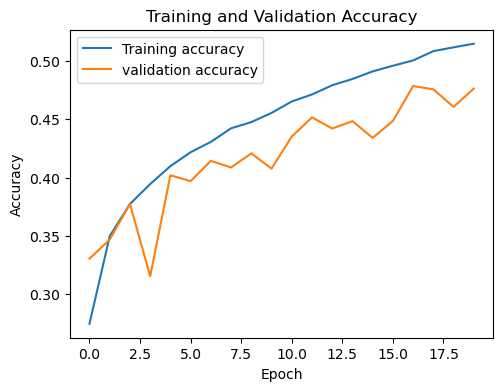

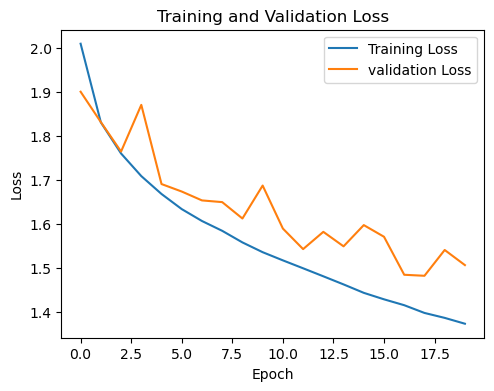

In [17]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(base_history.history['accuracy'],label='Training accuracy')
plt.plot(base_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(base_history.history['loss'],label='Training Loss')
plt.plot(base_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

XAVIER Initialisation   (Weight init)

In [20]:
from tensorflow.keras.initializers import GlorotUniform
xavier_model=Create_model(init=GlorotUniform())
xavier_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
xavier_history=xavier_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2234 - loss: 2.1451 - val_accuracy: 0.3063 - val_loss: 1.9085
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3408 - loss: 1.8674 - val_accuracy: 0.3403 - val_loss: 1.8421
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3710 - loss: 1.7864 - val_accuracy: 0.3203 - val_loss: 1.8916
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3945 - loss: 1.7317 - val_accuracy: 0.3939 - val_loss: 1.7164
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4076 - loss: 1.6860 - val_accuracy: 0.3556 - val_loss: 1.7967
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4149 - loss: 1.6563 - val_accuracy: 0.4120 - val_loss: 1.6621
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4296 - loss: 1.6119 - val_accuracy: 0.4172 - val_loss: 1.6780
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4395 - loss: 1.5897 - val_accuracy: 0.

In [22]:
test_loss,test_accuracy=xavier_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4670 - loss: 1.5013
Test Accuracy :0.4670


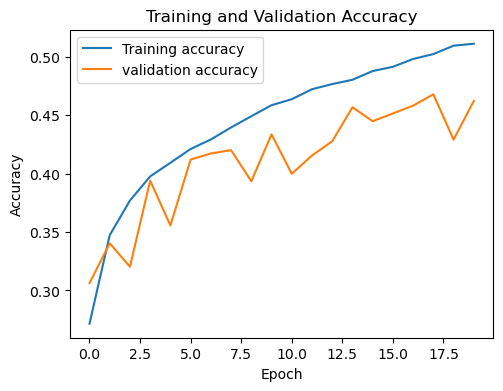

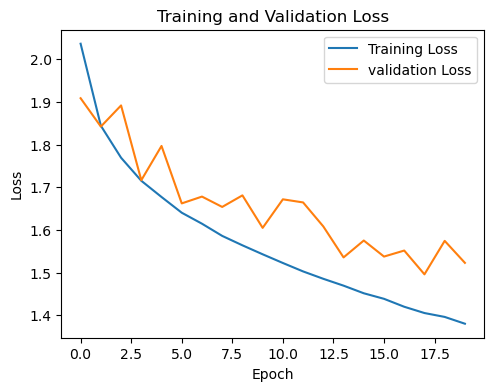

In [23]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(xavier_history.history['accuracy'],label='Training accuracy')
plt.plot(xavier_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(xavier_history.history['loss'],label='Training Loss')
plt.plot(xavier_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Kaiming Initialisation   (Weight init)

In [25]:
from tensorflow.keras.initializers import HeNormal
kaiming_model=Create_model(init=GlorotUniform())
kaiming_model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
kaiming_history=kaiming_model.fit(x_train,y_train,epochs=20,batch_size=128, validation_split=0.2)

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2160 - loss: 2.1301 - val_accuracy: 0.3113 - val_loss: 1.9373
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3383 - loss: 1.8768 - val_accuracy: 0.3485 - val_loss: 1.8490
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3622 - loss: 1.8034 - val_accuracy: 0.3849 - val_loss: 1.7731
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3855 - loss: 1.7388 - val_accuracy: 0.3830 - val_loss: 1.7370
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4048 - loss: 1.6936 - val_accuracy: 0.3785 - val_loss: 1.7379
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4158 - loss: 1.6568 - val_accuracy: 0.4001 - val_loss: 1.6939
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4292 - loss: 1.6252 - val_accuracy: 0.4116 - val_loss: 1.6588
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4313 - loss: 1.6004 - val_accuracy: 0.

In [26]:
test_loss,test_accuracy=kaiming_model.evaluate(x_test,y_test,verbose=2)
print(f'Test Accuracy :{test_accuracy:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.4901 - loss: 1.4374
Test Accuracy :0.4901


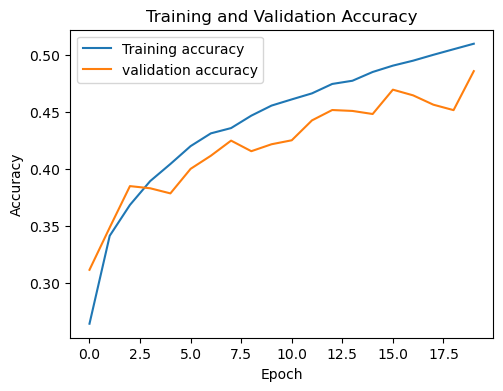

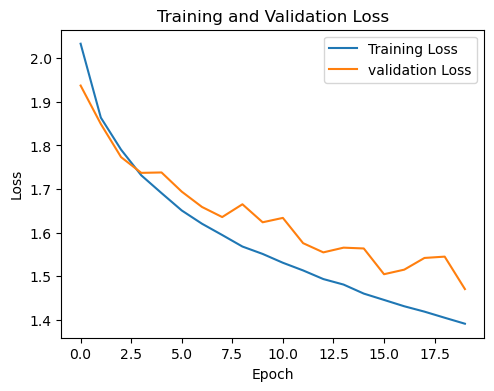

In [27]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(kaiming_history.history['accuracy'],label='Training accuracy')
plt.plot(kaiming_history.history['val_accuracy'],label='validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.plot(kaiming_history.history['loss'],label='Training Loss')
plt.plot(kaiming_history.history['val_loss'],label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()